In [2]:
using Distributions, Plots
include("../src/JS_SAA_Main.jl")

JS

In [3]:
pyplot()
srand(8675309)

#Gen Pks uniformly over interval for now
#Done in a weird way to match the general dirichlet setup
K = 10001
#ps = rand(K);
ps = rand(Dirichlet(ones(2)), K)
ps = vec(ps[2, :])

N = 20
Nhats = rand(Poisson(N), K)
mhats = JS.nv_sim_path(ps, Nhats);

### Baseline Oracle Curve for intuitive playing.

In [26]:
JS.nv_obj(mhats, ps, .5, 1, Nhats, s)

0.41240862679019646

In [43]:
s = .9 #Service level  #b = s/(1-s)
p0 = .5
alpha_grid = linspace(0, N, 100)

zstar = JS.exp_nv_fullInfo(ps, s)
alphaOR, jstar, outOR = JS.nv_oracle_alpha(mhats, ps, p0, alpha_grid, Nhats, s)
alphaApriori, jstar, outAP = JS.nv_apriori_alpha(ps, p0, alpha_grid, Nhats, s)
alphaLOO, jstar, outLOO = JS.nv_loo_alpha(mhats, p0, alpha_grid, Nhats, s)
alphaOR, alphaLOO

p0OR, alphaOR2, jstar = JS.nv_oracle_both(mhats, ps, linspace(0, 1, 20), alpha_grid, Nhats, s)
p0LOO, alphaLOO2, jstar = JS.nv_loo_both(mhats, linspace(0, 1, 20), alpha_grid, Nhats, s)

println("SAA:\t", JS.nv_obj(mhats, ps, .5, 0, Nhats, s))
println() 
println("p0 = .5")
println("OR\t", alphaOR, "\t", JS.nv_obj(mhats, ps, .5, alphaOR, Nhats, s))
println("LOO\t", alphaLOO, "\t", JS.nv_obj(mhats, ps, .5, alphaLOO, Nhats, s))
println()
println("OR p0\t", p0OR, "\t", alphaOR2, "\t", JS.nv_obj(mhats, ps, p0OR, alphaOR2, Nhats, s) ) 
println("LOO p0\t", p0LOO, "\t", alphaLOO2, "\t", JS.nv_obj(mhats, ps, p0LOO, alphaLOO2, Nhats, s))


SAA:	0.4746169322472867

p0 = .5
OR	2.4242424242424243	0.46705695437633216
LOO	1.4141414141414141	0.46888101801749166

OR p0	0.15789473684210525	15.555555555555555	0.46705695437633216
LOO p0	0.15789473684210525	8.686868686868687	0.46888101801749166


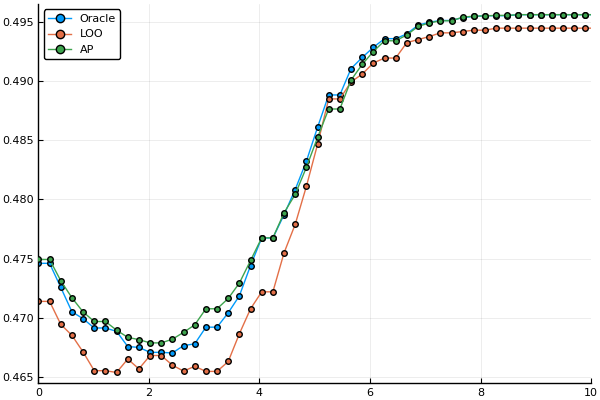

In [45]:
plot(alpha_grid, [outOR outLOO/N outAP] , marker=:circ, label=["Oracle" "LOO" "AP"])
#ylabel!("% Benefit over SAA")
xlims!(0, 10)

In [41]:
N

10

### An example for paper where tweaking the costs in a small way dramatically changes value of shrinkage

In [ ]:
##VG Needs updating 
N = 20
p0 = .5 #mean(ps)
K = length(ps)
s1 = .955
s2 = .95

out = map(a-> JS.exp_nv_obj(ps, p0, a, N, s1), alpha_grid) 
benefit = 1 - out/out[1]
println("Oracle Benefit:\t", maximum(benefit))
println("Max Possible:\t", 1- JS.exp_nv_fullInfo(ps, s1)/out[1])


out = map(a-> JS.exp_nv_obj(ps, p0, a, N, s2), alpha_grid) 
benefit2 = 1 - out/out[1]

println()
println("Oracle Benefit:\t", maximum(benefit2))
println("Max Possible:\t", 1- JS.exp_nv_fullInfo(ps, s2)/out[1])

plot(alpha_grid, 100 *[benefit benefit2], marker=:circ)
xlims!(0, 10)

### How does changing service level change size of benefit?

In [ ]:
##VG Needs updating

N = 20
#println("Mean ps = p0: \t", mean(ps))
p0 = .5

function oracle_benefit(p0, N, s)
    out = map(a-> JS.exp_nv_obj(ps, p0, a, N, s), alpha_grid)     
    #maximum(1 - out/out[1])
    maximum(1 - out)
end

#full_info_benefit(p0, N, s) = 1- JS.exp_nv_fullInfo(ps, s) / JS.exp_nv_obj(ps, p0, 0, N, s)
full_info_benefit(p0, N, s) = 1- JS.exp_nv_fullInfo(ps, s) 

s_grid = linspace(.2, .99, 100)
or_out = oracle_benefit.(p0, N, s_grid)
saa_out = 1 - map(s-> JS.exp_nv_obj(ps, p0, 0, N, s), s_grid)
full_out = full_info_benefit.(p0, N, s_grid);


In [ ]:
plot(s_grid, 100 * [or_out, saa_out, full_out], marker=:circ, labels=["Oracle" "Saa" "Full-Info"])
ylabel!("% Benefit over SAA")
xlims!(.6, 1)

In [ ]:
ones(Int, 3)

### Convergence for a fixed Alpha?

In [ ]:
K = 2^25
ps = rand(K);
N = 20
s = .5 #Service level  #b = s/(1-s)
p0 = .5
alpha = 1  #bayes optimal value 

srand(86309)
Nhats = rand(Poisson(N), K);
Nhats = 20 * ones(Int, K)
mhats = JS.sim_path(ps, Nhats);

K_grid = 2.^(8:25)
out1 = zeros(length(K_grid))
out2 = zeros(length(K_grid))

for i = 1:length(K_grid)
    out1[i] = JS.nv_obj(mhats[1:K_grid[i]], ps[1:K_grid[i]], p0, alpha, Nhats[1:K_grid[i]], s) 
    out2[i] = JS.nv_loo(mhats[1:K_grid[i]], p0, alpha, Nhats[1:K_grid[i]], s)/N
end





In [ ]:
plot(log2.(K_grid), [out1 out2], marker=:circ)

### LOO Stability decomposition

In [ ]:
pyplot()
srand(8675309)

#Gen Pks uniformly over interval for now
K = 10001
ps = rand(K);
#ps = .5
N = 10
Nhats = rand(Poisson(N), K);
#Nhats = ones(Int, K) * N;

mhats = JS.sim_path(ps, Nhats);


In [ ]:
s = .9 #Service level  #b = s/(1-s)
p0 = .5
alpha_grid = linspace(0, 10, 50)

saa_term = map(a-> JS.nv_saa(mhats, p0, a, Nhats, s), alpha_grid) 
stab_term = map(a->JS.nv_loo(mhats, p0, a, Nhats, s), alpha_grid) - saa_term

plot(alpha_grid, [saa_term stab_term saa_term+stab_term], marker=:circ, label=["Training" "Stability" "Total"], layout=(1, 3) )
# plt = twinx()
# plot!(plt, stab_term, marker=:circ)

#plot(alpha_grid, stab_term + saa_term)

xlims!(0, 5)
xlabel!("Alpha")

### Some Notes
 - Oracle can offer no benefit for all of p0 = 0, .5, 1
 - Normal approximation can be quite bad... suggests there is a benefit when there isn't.

### Original and shrunken cost-curves

In [ ]:
#Plots the SAA cost curve across p_k and the shrunken cost curve across p_k.  Notice, Benefits when p_k > 1-q.

saa_objs = map(p-> obj_k(0, p, p0), ps)
or_objs = map(p->obj_k(alphaOR, p, p0), ps)
#full_objs = map(p->obj_k(.99, p, p0), ps)

plot(ps, saa_objs, ".")
plot(ps, or_objs, ".r")
#plot(ps, full_objs, "--k")
axhline(out[1])
axhline(minimum(out), color="r")
axvline(1-q, linestyle="dotted", color="k")

In [ ]:
##Evaluate the "deriv" at two points equally spaced from 1-q

delta = .01
low = 1-q - delta
high= 1-q + delta

function prob_deriv(p, p0, alpha)
    prob_portion(alpha, p, p0) - prob_portion(0, p, p0)
end
delta_grid = linspace(0, 1-q, 30)
low = map(d->prob_deriv(1-q-d, p0, alphaOR), delta_grid)
high= map(d->prob_deriv(1-q+d, p0, alphaOR), delta_grid)

plot(delta_grid, low, "--k")
plot(delta_grid, high, "--r")



### Plots the losses for $p_k < 1-q$ vs. the benefits for $p_k > 1-q$

In [ ]:
floor.(Int, rand(K))
#floor.(rand(K), Int)
#? floor

In [ ]:
srand(8675309)
K = 100
ps = rand(K);
Nhats = 20 * floor.(Int, rand(K))
#Nhats = rand(Poisson(20), K)
alpha_grid = linspace(0, 80, 80)
ss = rand(K)/4 + .75

p0 = .5
mhats = JS.nv_sim_path(ps, Nhats)
zstar = JS.exp_nv_fullInfo(ps, s)

alphaOR, jstar, outOR = JS.nv_oracle_alpha(mhats, ps, p0, alpha_grid, Nhats, s)
alphaApriori, jstar, outAP = JS.nv_apriori_alpha(ps, p0, alpha_grid, Nhats, s)
alphaLOO, jstar, outLOO = JS.nv_loo_alpha(mhats, p0, alpha_grid, Nhats, s)
alphaOR, alphaLOO

p0OR, alphaOR2, jstar = JS.nv_oracle_both(mhats, ps, linspace(0, 1, 20), alpha_grid, Nhats, s)
p0LOO, alphaLOO2, jstar = JS.nv_loo_both(mhats, linspace(0, 1, 20), alpha_grid, Nhats, s)

println("SAA:\t", JS.nv_obj(mhats, ps, .5, 0, Nhats, s))
println() 
println("p0 = .5")
println("OR\t", alphaOR, "\t", JS.nv_obj(mhats, ps, .5, alphaOR, Nhats, s))
println("LOO\t", alphaLOO, "\t", JS.nv_obj(mhats, ps, .5, alphaLOO, Nhats, s))
println()
println("OR p0\t", p0OR, "\t", alphaOR2, "\t", JS.nv_obj(mhats, ps, p0OR, alphaOR2, Nhats, s) ) 
println("LOO p0\t", p0LOO, "\t", alphaLOO2, "\t", JS.nv_obj(mhats, ps, p0LOO, alphaLOO2, Nhats, s))
